### 1. Import Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("data/train.csv")
pd.set_option('display.max_columns',100)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


### 2. Data Exploration, Cleaning And Handling

In [10]:
df.shape

(103904, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [19]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [23]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [39]:
df=df.drop(['Unnamed:0','id',axis=1)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


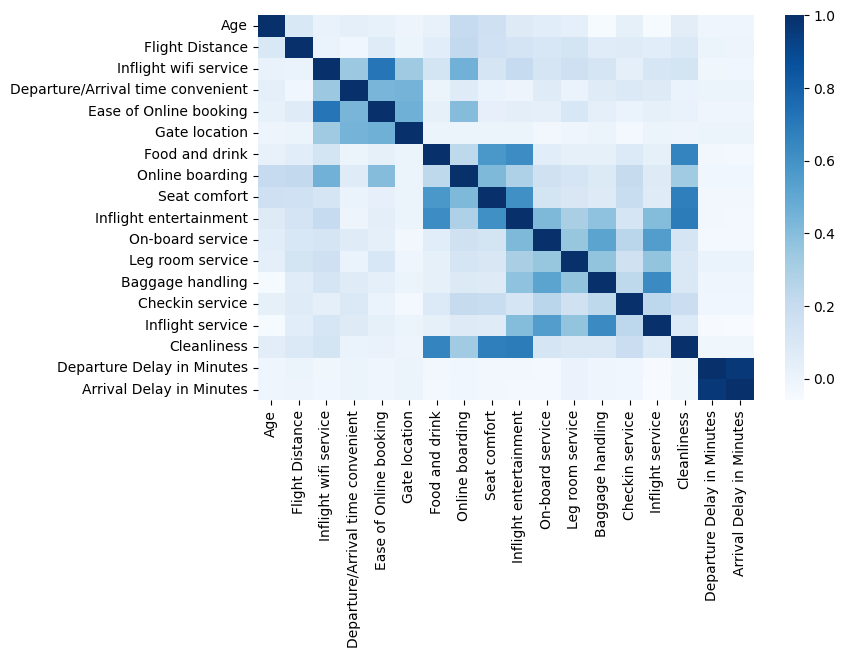

In [41]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr,cmap='Blues')
plt.show()

In [ ]:
# Arrival Delay and Departure Delay are highly positive correlated to each other : If a flight departes lates then it arrives late

In [42]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# There are outliers in the Dataset 

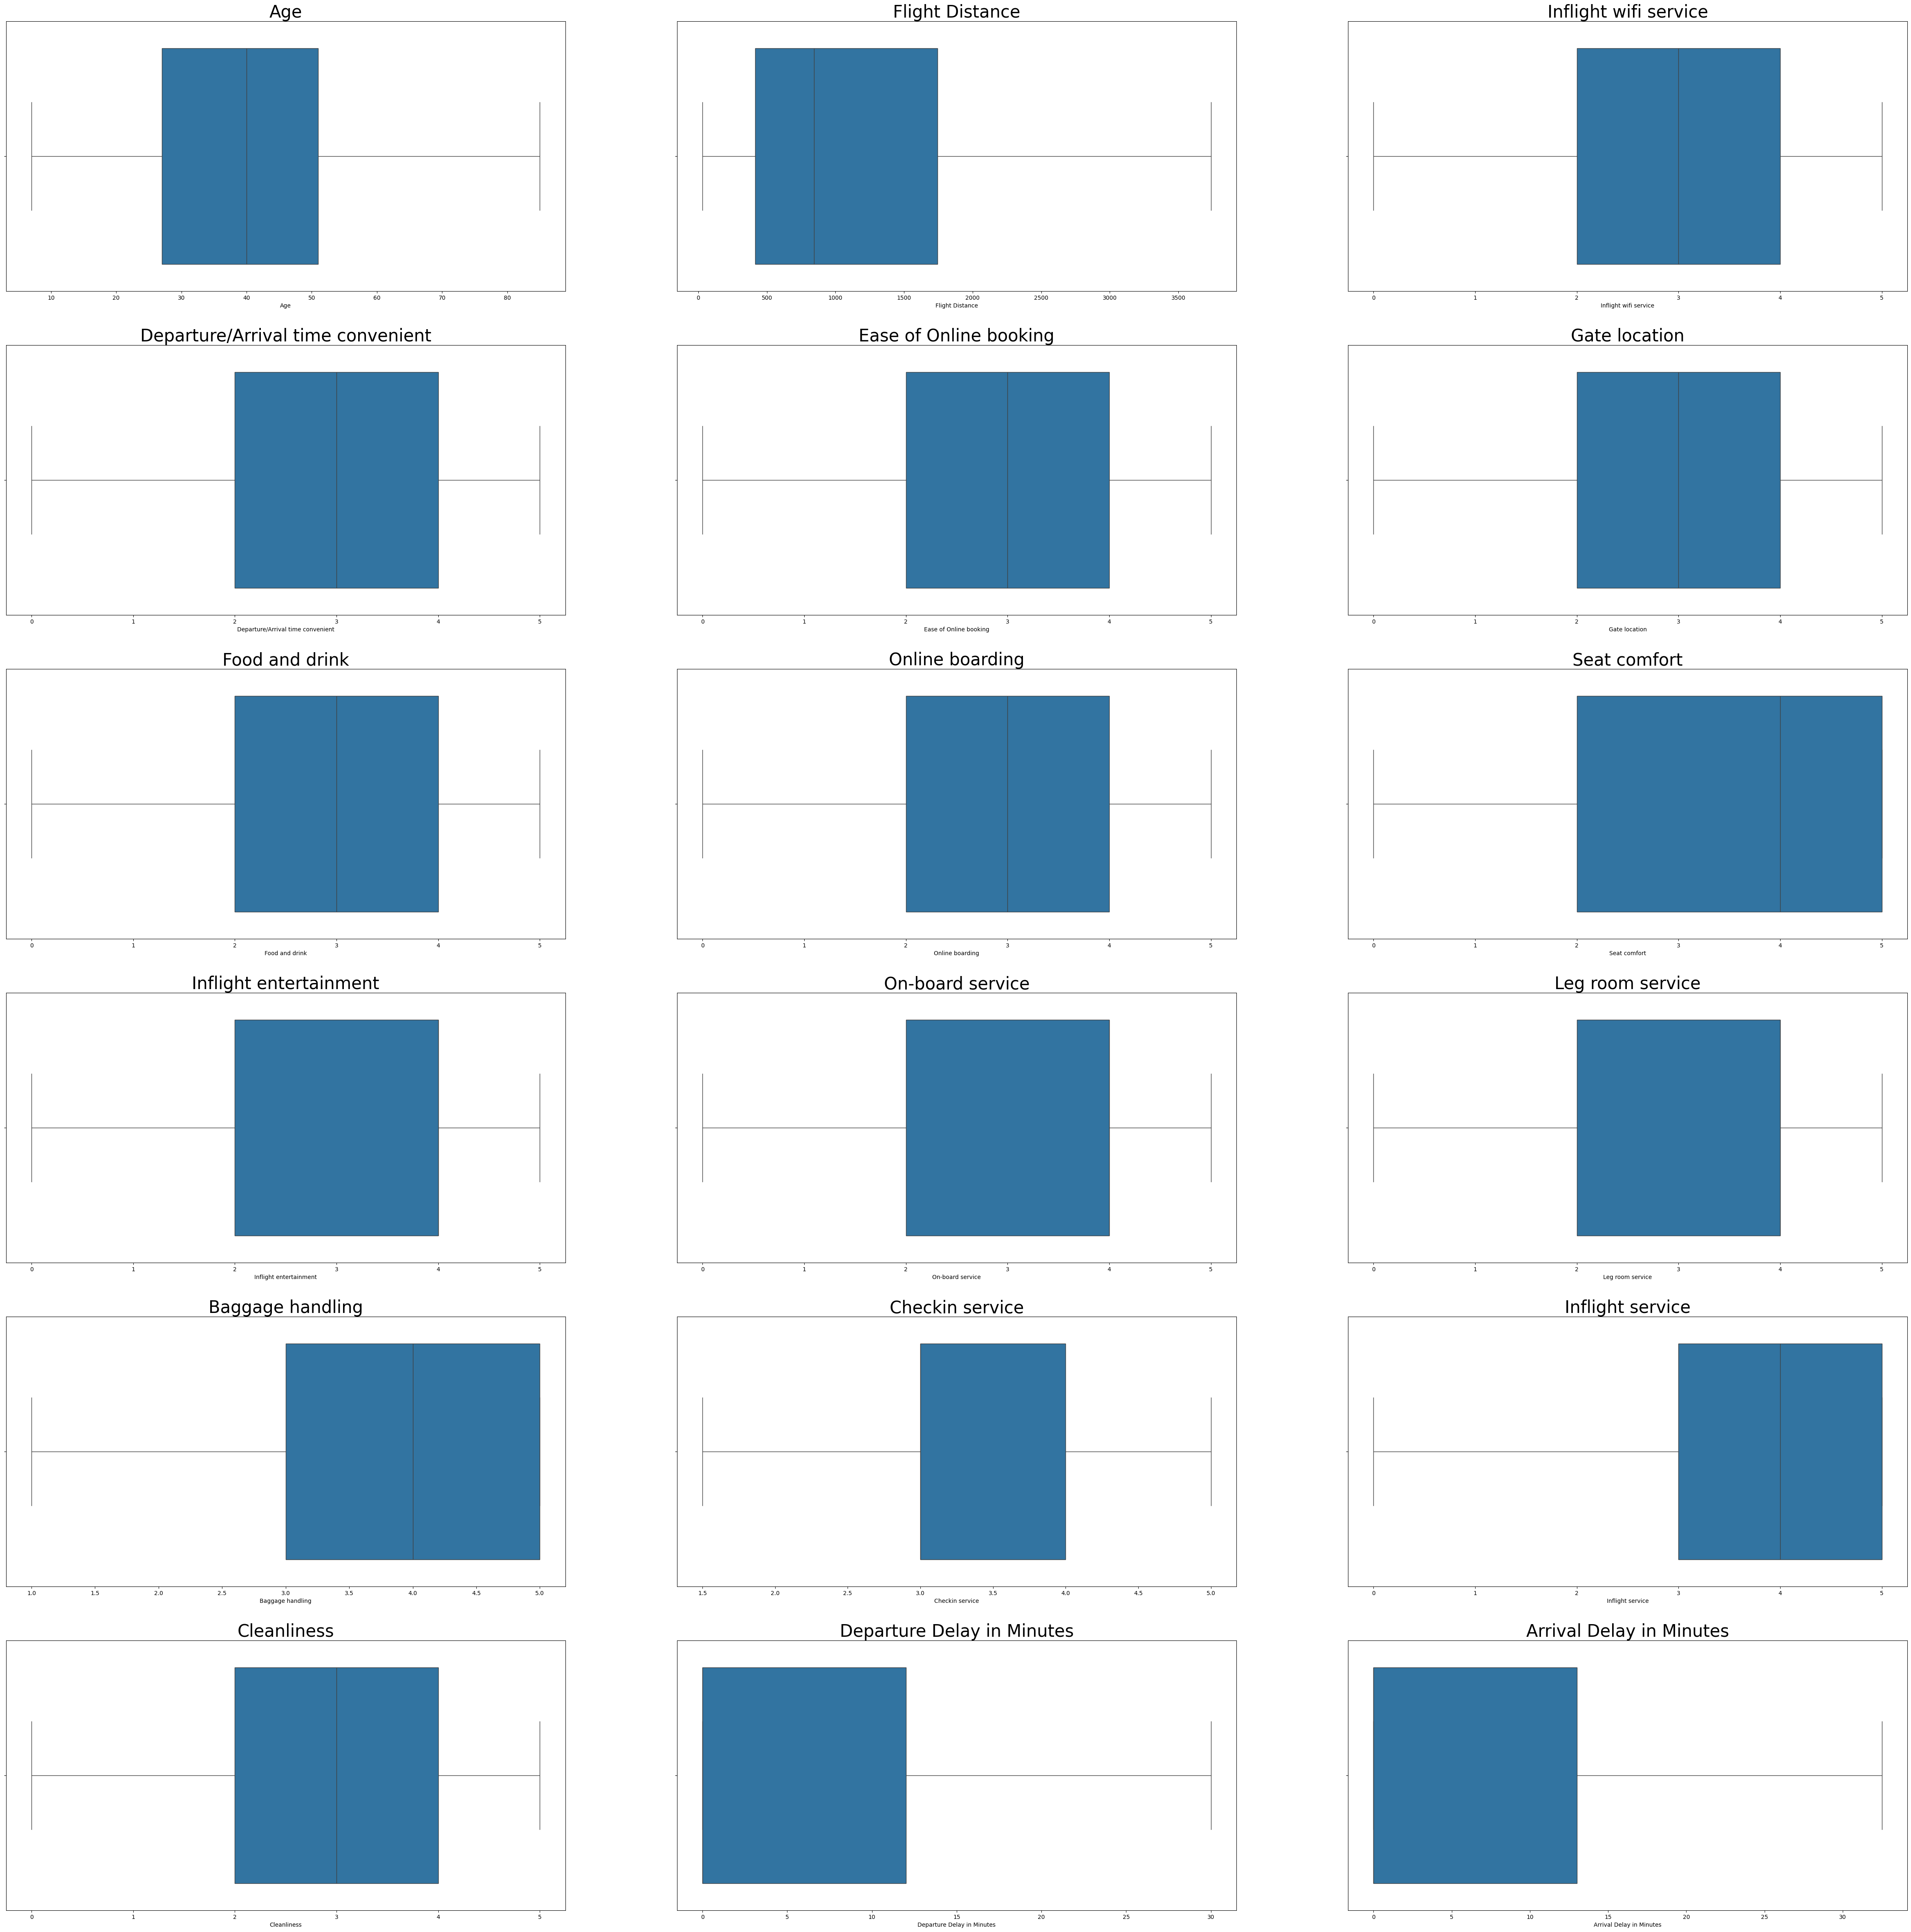

In [65]:
# check for outliers
numerical = df.select_dtypes(include=['int','float'])

fig , axes = plt.subplots(6,3,figsize=(60,60))
axes =axes.flatten()

for i , col in enumerate(numerical.columns):
    
     sns.boxplot(x=df[col],ax=axes[i])
     axes[i].set_title(col,fontsize=30)

plt.show()

In [ ]:
# Outliers ar in the following Columns
1. Flight Distance
2. Checkin service
3. Departure Delay
4. Arrival Delay

In [62]:
### Handle outliers

def handle_outliers(df,columns):
    for column in columns:
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound,upper=upper_bound)

    return df
   

     

columns_to_handle = ['Flight Distance','Checkin service','Departure Delay in Minutes','Arrival Delay in Minutes']
df=handle_outliers(df,columns_to_handle)
    

In [64]:
### Handle null values of Arrival Delay in Minutes

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

### 3. EDA

In [66]:
new_df = df.copy()

In [67]:
columns_with_six_cat = new_df.columns[new_df.nunique()==6]
columns_with_six_cat

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [68]:
ordinal_mapping = {
    0:"Very Poor",
    1:"Poor",
    2:"Average",
    3:"Good",
    4:"Excellent",
    5:"Outstanding"
}

In [69]:
new_df[columns_with_six_cat] = new_df[columns_with_six_cat].applymap(lambda x: ordinal_mapping.get(x,x))

C:\Users\Jayant\AppData\Local\Temp\ipykernel_16672\3560696383.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df[columns_with_six_cat] = new_df[columns_with_six_cat].applymap(lambda x: ordinal_mapping.get(x,x))


In [70]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,4,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


In [71]:
df['Baggage handling'].value_counts()

Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64

In [77]:
ordinal = {
    1:"Very Poor",
    2:"Poor",
    3:"Average",
    4:"Good",
    5:"Excellent",
}

new_df['Baggage handling']=new_df['Baggage handling'].apply(lambda x: ordinal_mapping.get(x,x))

In [78]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Excellent,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


In [79]:
df['Checkin service'].value_counts()

Checkin service
4.0    29055
3.0    28446
5.0    20619
2.0    12893
1.5    12891
Name: count, dtype: int64

In [80]:
mapping= {
    1.5:"Very Poor",
    2.0:"Poor",
    3.0:"Average",
    4.0:"Good",
    5.0:"Excellent",
}

new_df['Checkin service']=new_df['Checkin service'].apply(lambda x: ordinal_mapping.get(x,x))

In [81]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Excellent,Excellent,Outstanding,Outstanding,25,18.0,neutral or dissatisfied


In [82]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

#### UNIVARIATE EDA

In [88]:
numerical_columns = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',        'satisfaction']

C:\Users\Jayant\AppData\Local\Temp\ipykernel_16672\3353405691.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],ax=axes[i+1+j],palette='viridis')
C:\Users\Jayant\AppData\Local\Temp\ipykernel_16672\3353405691.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],ax=axes[i+1+j],palette='viridis')
C:\Users\Jayant\AppData\Local\Temp\ipykernel_16672\3353405691.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],ax=axes[i+1+j],palette='viridis')
C:\Users\Jayant\AppData\Local\Temp\ipykernel_16672\3353405691.py

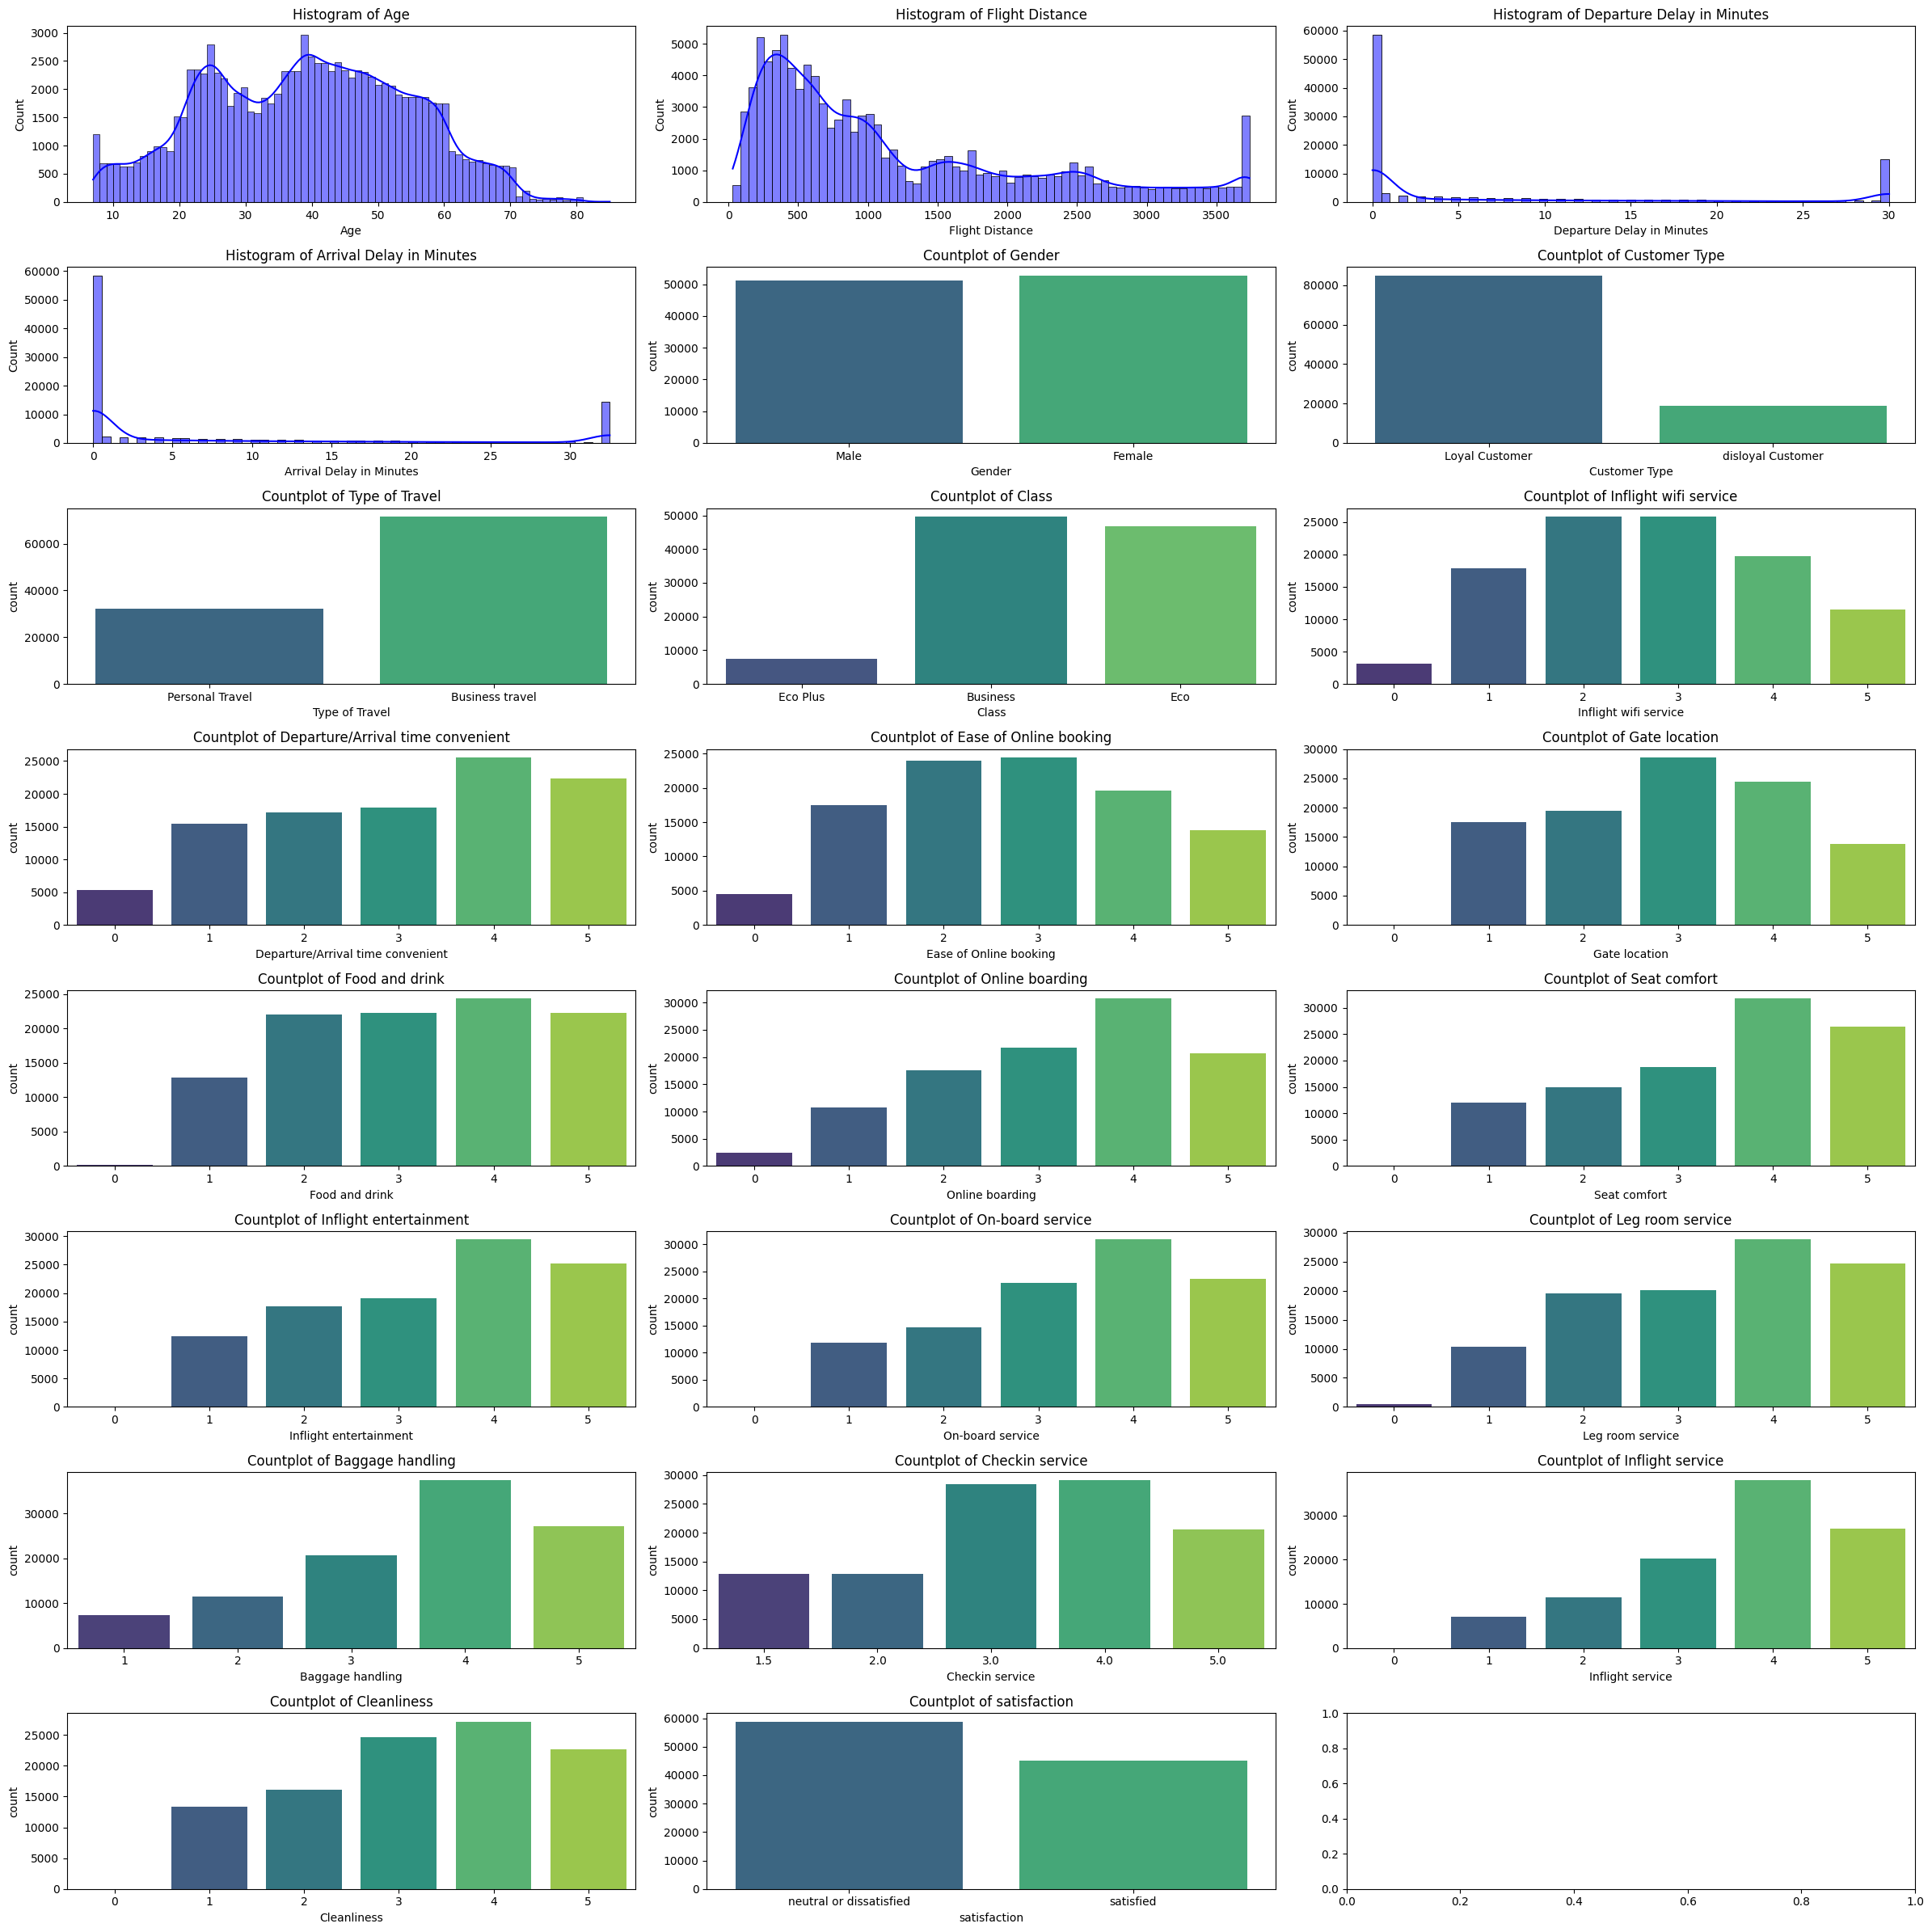

In [89]:
fig , axes = plt.subplots(8,3,figsize=(24,24))
axes = axes.flatten()

for i,col in enumerate(numerical_columns):
    sns.histplot(df[col],kde=True,ax=axes[i],color='blue')
    axes[i].set_title(f"Histogram of {col}")

for j,col in enumerate(categorical_columns):
    if i + 1 + j < len(axes):
        sns.countplot(x=df[col],ax=axes[i+1+j],palette='viridis')
        axes[i+1+j].set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

#### BIVARIATE EDA

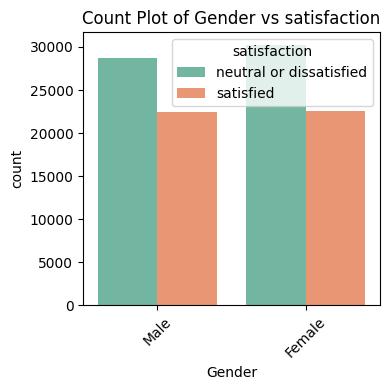

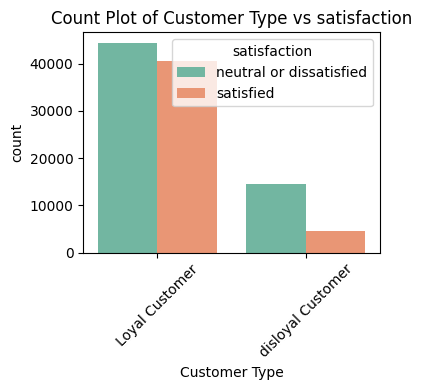

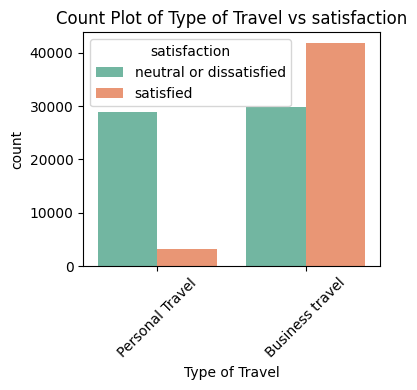

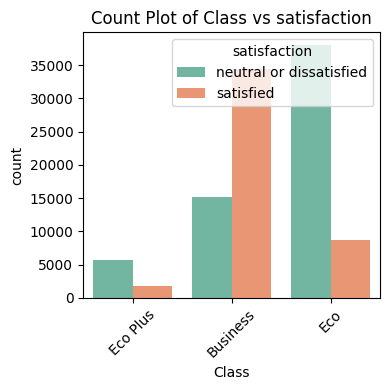

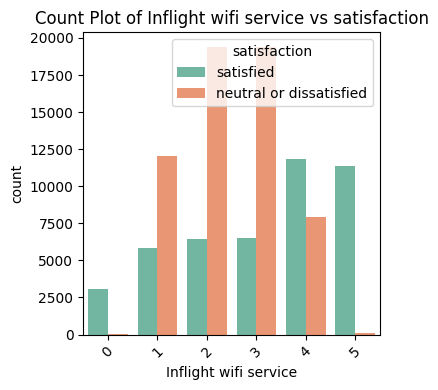

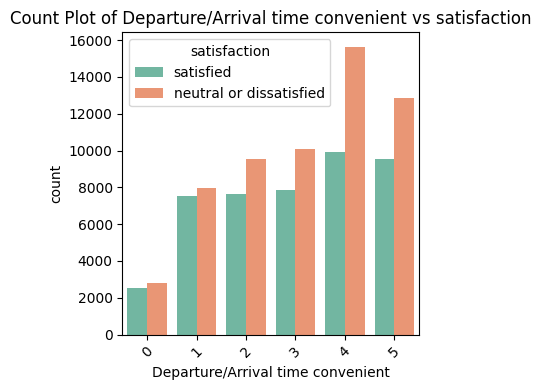

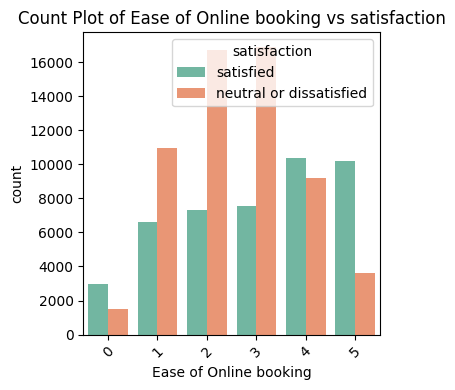

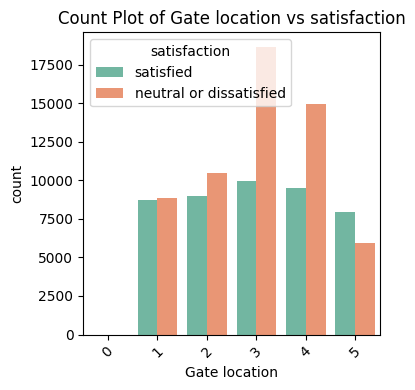

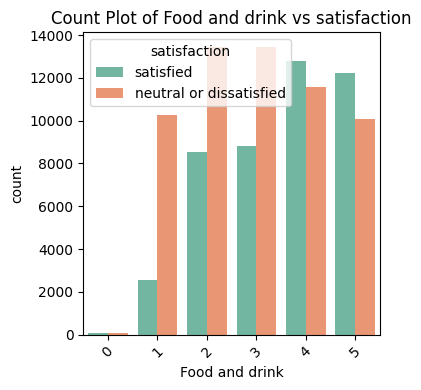

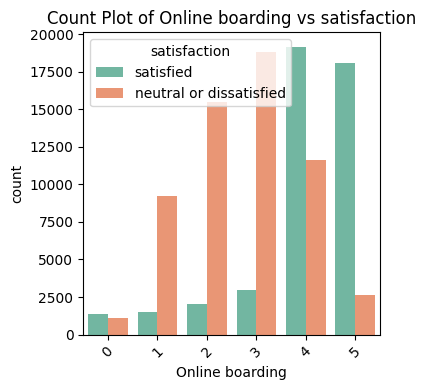

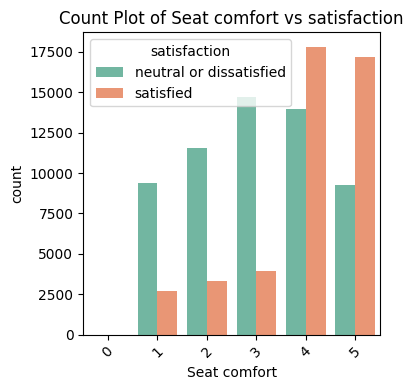

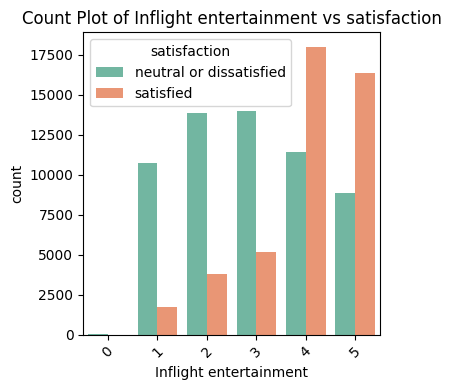

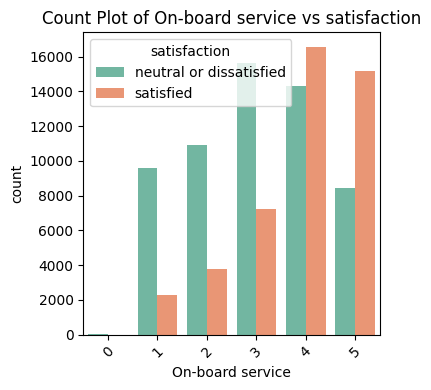

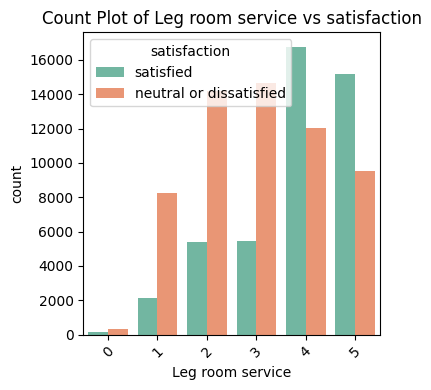

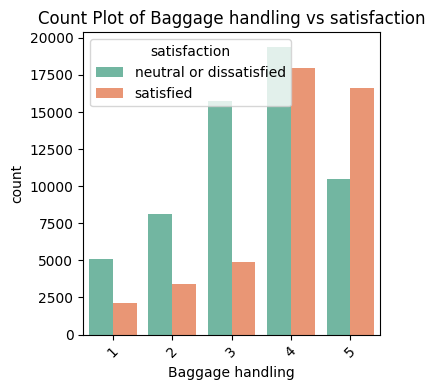

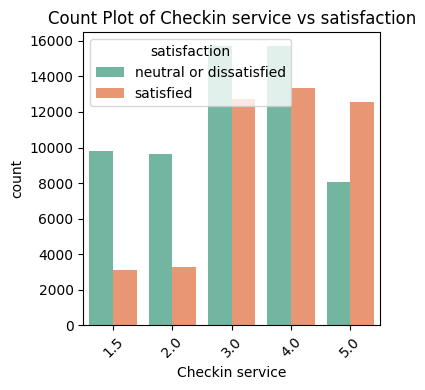

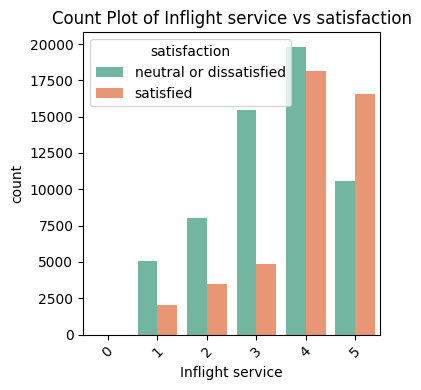

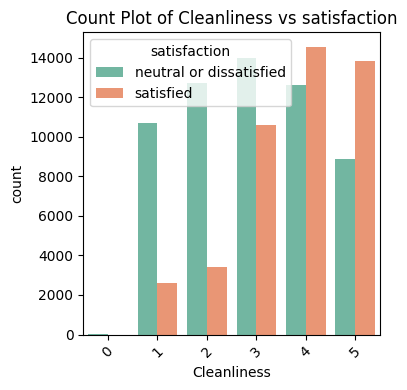

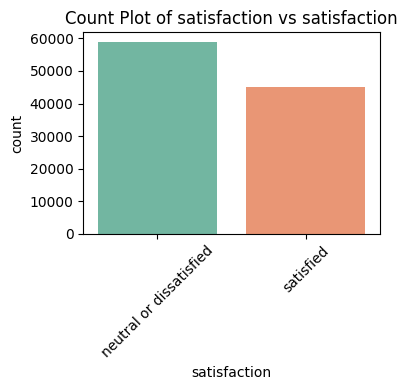

C:\Users\Jayant\AppData\Local\Temp\ipykernel_16672\4112680035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette="Set2")


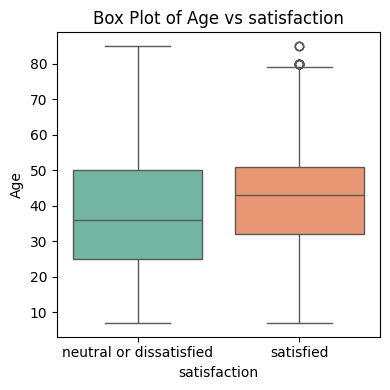

C:\Users\Jayant\AppData\Local\Temp\ipykernel_16672\4112680035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette="Set2")


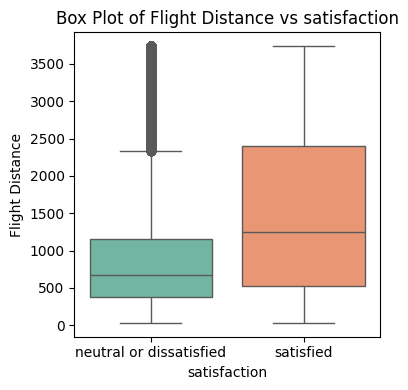

C:\Users\Jayant\AppData\Local\Temp\ipykernel_16672\4112680035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette="Set2")


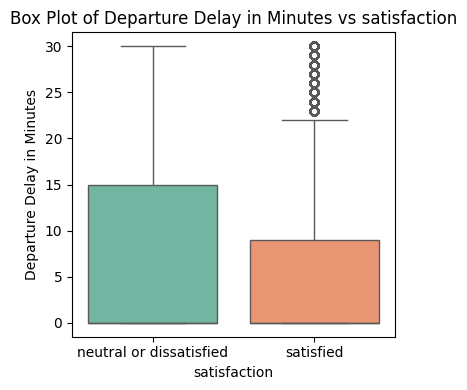

C:\Users\Jayant\AppData\Local\Temp\ipykernel_16672\4112680035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette="Set2")


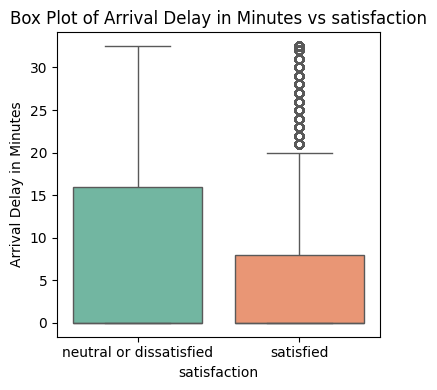

In [91]:
target_col = 'satisfaction'
def plot_categorical_vs_target(df, categorical_columns, target_col):
    """Generate count plots for categorical columns against the target."""
    for col in categorical_columns:
        plt.figure(figsize=(4,4))
        sns.countplot(data=df, x=col, hue=target_col, palette="Set2")
        plt.title(f'Count Plot of {col} vs {target_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def plot_numerical_vs_target(df, numerical_columns, target_col):
    """Generate box plots for numerical columns against the target."""
    for col in numerical_columns:
        # Box Plot
        plt.figure(figsize=(4,4))
        sns.boxplot(data=df, x=target_col, y=col, palette="Set2")
        plt.title(f'Box Plot of {col} vs {target_col}')
        plt.tight_layout()
        plt.show()

        
# Call functions for visualizations
plot_categorical_vs_target(df, categorical_columns, target_col)
plot_numerical_vs_target(df, numerical_columns, target_col)

### 4. Feature Engineering

In [93]:
### Make a new column using Feature Construction (Domain Knowledge) 
df['Total delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [95]:
df['Delay Ratio'] = df['Total delay'] + (df['Flight Distance'] + 1)

In [96]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total delay,Delay Ratio
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,504.0


In [97]:
### Convert Age using Binning
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Youngster', 'Adult', 'Senior'])


In [98]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total delay,Delay Ratio,Age Group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,504.0,Child


In [99]:
df.dtypes

Gender                                 object
Customer Type                          object
Age                                     int64
Type of Travel                         object
Class                                  object
Flight Distance                       float64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                       float64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

In [100]:
### Label Encoding (Because model should be given data in numerical form)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Age Group']

label_mappings = {}

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for Gender: {'Female': 0, 'Male': 1}
Mapping for Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Mapping for Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Mapping for Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
Mapping for satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}
Mapping for Age Group: {'Adult': 0, 'Child': 1, 'Senior': 2, 'Youngster': 3}


In [101]:
### Feature Selection for Selecting most Imp. features
from sklearn.model_selection import train_test_split

X = df.drop(columns='satisfaction')
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
### More the Mutual Informatin more its is important

from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mutual_info = mutual_info_classif(X_train, y_train, discrete_features=True)

# Create a DataFrame for mutual information
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

print(mutual_info_df)


C:\Users\Jayant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Jayant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


                              Feature  Mutual Information
11                    Online boarding            0.211611
6               Inflight wifi service            0.161543
4                               Class            0.134969
3                      Type of Travel            0.113675
23                        Delay Ratio            0.100213
13             Inflight entertainment            0.092882
5                     Flight Distance            0.084806
12                       Seat comfort            0.078537
15                   Leg room service            0.060404
14                   On-board service            0.057027
8              Ease of Online booking            0.051391
19                        Cleanliness            0.051153
2                                 Age            0.046413
16                   Baggage handling            0.042488
18                   Inflight service            0.040945
17                    Checkin service            0.031965
10            

C:\Users\Jayant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Jayant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\Jayant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [103]:
### Create our final dataframe with important features

top_feat = mutual_info_df.head(12)['Feature'].tolist()

In [104]:
final_df = df[top_feat + ['satisfaction']]

In [105]:
final_df.head(3)

,Online boarding,Inflight wifi service,Class,Type of Travel,Delay Ratio,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness,satisfaction
0,3,3,2,1,504.0,5,460.0,5,3,4,3,5,0
1,3,3,0,0,243.0,1,235.0,1,5,1,3,1,0
2,5,2,0,0,1143.0,5,1142.0,5,3,4,2,5,1


In [107]:
final_df.shape

(103904, 13)

In [110]:
final_df['satisfaction'].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

### 5. Model Training

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

# Sample 10% of the data
df_sample = final_df.sample(frac=0.05, random_state=42)

# Prepare the sample data
X_sample = final_df.drop(columns='satisfaction')
y_sample = final_df['satisfaction']


# Split the sampled data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss')
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_sample, y_train_sample)
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test_sample, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

C:\Users\Jayant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jayant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350
Logistic Regression: 0.8209
Random Forest: 0.9417
Gradient Boosting: 0.9227
AdaBoost: 0.9101
Support Vector Classifier: 0.6629
K-Nearest Neighbors: 0.8051
Naive Bayes: 0.8491
Decision Tree: 0.9204
LightGBM: 0.9444
XGBoost: 0.9433


In [112]:
### LGBM is best model for us

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb

X = final_df.drop(columns='satisfaction')
y = final_df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier()

In [114]:
y_pred = lgbm_model.predict(X_test)

In [116]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted') 

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9444
Precision: 0.9445
Recall: 0.9444
F1 Score: 0.9443


In [117]:
### No need of hyperparameter tuning

### 6. Model Saving

In [118]:
import pickle
with open('lgbm_model.pkl','wb') as file:
    pickle.dump(lgbm_model,file)


### 7. Model Testing

In [119]:
with open('lgbm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [120]:
X_test[8:15]

,Online boarding,Inflight wifi service,Class,Type of Travel,Delay Ratio,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness
65495,4,2,1,1,1025.0,5,1024.0,4,2,5,2,3
2787,2,2,0,0,1817.0,2,1813.0,2,1,3,4,2
71140,2,1,0,0,3392.0,5,3391.0,4,5,5,1,4
75370,5,2,0,0,509.0,4,507.0,5,4,4,2,3
80740,3,0,1,0,403.0,1,402.0,1,4,3,0,1
9281,2,2,1,1,490.0,5,488.0,5,5,5,2,5
42729,5,1,0,0,2953.0,5,2922.0,5,3,3,1,5


In [121]:
y_test[8:15]

65495    0
2787     0
71140    1
75370    1
80740    1
9281     0
42729    1
Name: satisfaction, dtype: int32

In [122]:
X_new = np.array([
    [4	,2,	1,	1,	1025.0,	5,	1024.0,	4,	2,	5,	2,	3],
    [5	,2,	0,	0,	509.0,	4,	507.0,	5,	4,	4,	2,	3]
])

In [123]:
y_pred_new = loaded_model.predict(X_new)
print("Predictions: ",y_pred_new)

Predictions:  [0 1]
